Read DF's

In [1]:
import numpy as np
import pandas as pd

us_trending_df = pd.read_csv("./data/stage_1_us_trending.csv")
color_text_df = pd.read_csv("./data/stage_2_thumbnail_colors_and_text.csv")
face_df = pd.read_csv("./data/stage_2_thumbnail_face.csv")
objects_df = pd.read_csv("./data/stage_2_thumbnail_objects_vectors.csv")

Merge DF's

In [2]:
df = pd.concat([us_trending_df, color_text_df, face_df, objects_df], axis=1)
df.to_csv("./data/stage_3_out.csv",index=False)
df.head()

,video_id,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,comment_count,thumbnail_link,...,parking meter,skis,fork,cow,snowboard,fire hydrant,elephant,carrot,zebra,hair dryer
0,3C66w5Z0ixs,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,0.0,2020-08-12 00:00:00,1514614.0,156908.0,35313.0,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M9Pmf9AB4Mo,2020-08-11 17:00:10,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20.0,2020-08-12 00:00:00,2381688.0,146739.0,16549.0,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,J78aPJ3VyNs,2020-08-11 16:34:06,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,0.0,2020-08-12 00:00:00,2038853.0,353787.0,40221.0,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,kXLn3HkpjaA,2020-08-11 16:38:55,UCbg_UMjlHJg_19SZckaKajg,XXL,0.0,2020-08-12 00:00:00,496771.0,23251.0,7647.0,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,VIUo6yapDbc,2020-08-11 15:10:05,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,0.0,2020-08-12 00:00:00,1123889.0,45802.0,2196.0,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Drop one of highly correlated attributes

In [3]:
corr_matrix = df.corr(method='spearman')

target_attr = 'likes'
corr_attr_threshold = 0.8
drop_set = set()

corr_matrix_filtered = corr_matrix[(abs(corr_matrix) > corr_attr_threshold) & (corr_matrix < 1.0)]

for k in corr_matrix_filtered:
    dct = dict(corr_matrix_filtered[k].dropna())

    for k2 in dct:

        if abs(corr_matrix[k][target_attr]) > abs(corr_matrix[k2][target_attr]):
            drop_set.add(k2)
            print(k,k2)
        else:
            drop_set.add(k)
            print(k2,k)

# for col in drop_set:
#     df.drop(col, axis=1, inplace=True)

print(drop_set)

#tutaj do predykcji kategorii jest
#jakis test hi2 powinien być zamiast korelacji

thumbnail_med_saturation thumbnail_avg_saturation
thumbnail_med_value thumbnail_avg_value
thumbnail_med_saturation thumbnail_avg_saturation
thumbnail_med_value thumbnail_avg_value
thumbnail_face_dominant_emotion thumbnail_has_face
thumbnail_face_age thumbnail_has_face
thumbnail_face_dominant_race thumbnail_has_face
thumbnail_has_face thumbnail_face_gender
thumbnail_face_emotion_angry thumbnail_face_emotion_disgust
thumbnail_face_emotion_angry thumbnail_face_emotion_disgust
thumbnail_face_emotion_disgust thumbnail_face_emotion_fear
thumbnail_face_emotion_disgust thumbnail_face_emotion_surprise
thumbnail_face_emotion_disgust thumbnail_face_emotion_fear
thumbnail_face_emotion_fear thumbnail_face_emotion_sad
thumbnail_face_emotion_fear thumbnail_face_emotion_surprise
thumbnail_face_emotion_fear thumbnail_face_emotion_sad
thumbnail_face_emotion_disgust thumbnail_face_emotion_surprise
thumbnail_face_emotion_fear thumbnail_face_emotion_surprise
thumbnail_face_emotion_neutral thumbnail_face_do

Calculate correlations between attributes and target class

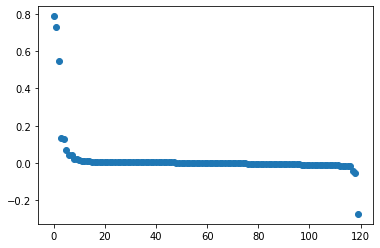

In [4]:
from matplotlib import pyplot as plt

corr_matrix_filtered = dict(df.corr(method='spearman')[target_attr].drop(target_attr).dropna())
corr_matrix_filtered = dict(sorted(corr_matrix_filtered.items(), key=lambda item: item[1], reverse=True))

plt.scatter(range(len(corr_matrix_filtered)), corr_matrix_filtered.values())
# jakiś wrapper można spróbować na grupach atrybutów

Find attributes with small correlation

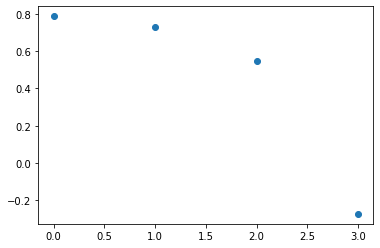

In [5]:
corr_target_threshold = 0.2

for k in list(corr_matrix_filtered.keys()):
    if abs(corr_matrix_filtered[k]) < corr_target_threshold:
        corr_matrix_filtered.pop(k)

plt.scatter(range(len(corr_matrix_filtered)), corr_matrix_filtered.values())

Drop attributes with small correlation from data and save to csv

In [6]:
columns_to_drop = [ele for ele in list(df.columns) if ele not in list(corr_matrix_filtered.keys())]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
df.to_csv("./data/stage_3_feature_importance.csv", index=False)
df.head()

# te cechy są raczej dla przewidywania kategorii
#feature wiz ?

,view_count,comment_count,likes_to_view_count_ratio,title_length
0,1514614.0,35313.0,0.103596,34.0
1,2381688.0,16549.0,0.061611,60.0
2,2038853.0,40221.0,0.173523,53.0
3,496771.0,7647.0,0.046804,56.0
4,1123889.0,2196.0,0.040753,55.0
